# Example of a change-detection problem.

Consider a random (e.g. Poisson) series of events, from which one wants to 
find a change in the rate of the events.  The problem is complicated since
the spurious detection rate will tend to confuse the result. 

This notebook gives an example of what detection rates are as the probability rate, 
that is the probability of an event occurring per unit time changes. 

The proposed detection algorithm computes the mean and variance of the events, and 
signals a detection as the detection threshold changes. 

This is a fair estimate of the spurious detection rate.

In [51]:
# Parameters

EVENT_RATE = 1.0     # Probability of an event per unit time
GROUPING = 7         # Number of samples to average over. 
SAMPLES = GROUPING * 100000

In [35]:
# Detector
from numpy import random
import numpy as np
import pandas as pd

def z_score(series):
    return (series - series.mean()) / series.std()


In [43]:
# Generate the z-scores of poisson-distributed events.
def generate_event_series(event_rate=EVENT_RATE, samples=SAMPLES, grouping=GROUPING):
    events = random.poisson(EVENT_RATE, SAMPLES)
    intervals = np.floor(np.arange(SAMPLES)/GROUPING)
    # Combine as a dataframe, then groupby to get interval sums.
    # Note that this is just another poisson series, 
    # with mean and variance = GROUPING * EVENT_RATE
    counts_df = pd.DataFrame(dict(events=events, intervals=intervals))
    interval_counts = counts_df.groupby(['intervals']).sum()
    return z_score(interval_counts)

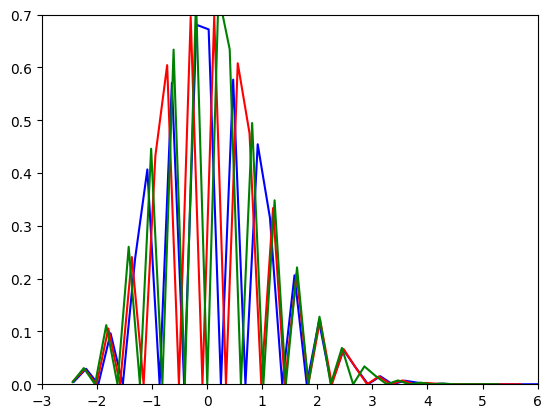

In [85]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
b_cnt = 39

plt.figure()
plt.axis([-3,6, 0, 0.7])
e1 = generate_event_series()
p1, v1 = np.histogram(e1, bins=b_cnt, density=True)
plt.plot(v1[1:]+1e-3, p1, 'b')
e2 = generate_event_series(event_rate=EVENT_RATE/10)
p1, v1 = np.histogram(e2, bins=b_cnt, density=True)
plt.plot(v1[1:], p1, 'r')
e3 = generate_event_series(event_rate=EVENT_RATE * 10)
p1, v1 = np.histogram(e3, bins=b_cnt, density=True)
plt.plot(v1[1:]-1e-3, p1,  'g')
plt.xlabel('z score')
plt.ylabel('binning probability')



         